<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guia Practica 2 IC 2023

## Ejercicio 1
Implemente el algoritmo de retropropagacion para un perceptron multicapa de forma que se pueda elegir libremente la cantidad de capas de la red y de neuronas en cada capa. Pruebelo entrenando una red de estructura apropiada para resolver el problema XOR, con sus particiones de entrenamiento y prueba correspondientes (datos de la Guıa de Trabajos Practicos 1).

In [ ]:
# cargamos los datos de entrenamiento
import numpy as np
datos_entrenamiento = np.genfromtxt("XOR_trn.csv", delimiter="," , skip_header=1)
datos_entrenamiento = datos_entrenamiento[0:99]
datos_ej1 = []
for i in np.arange(0,len(datos_entrenamiento)):
 datos_ej1.append( np.insert(datos_entrenamiento[i],0,-1) )
#datos = np.insert(datos_entrenamiento,0,-1,axis=1)
#print(datos_ej1)

In [ ]:
# definimos el tamaño de la red y la cantidad de neuronas en cada capa
red_size = [2,1]

In [ ]:
# defino la matriz de pesos
pesos_ej1 = []
pesos_ej1.append(np.random.rand(red_size[0],len(datos_entrenamiento[0]-1))-0.5)
for i in np.arange(1,len(red_size)):
  pesos_ej1.append(np.random.rand(red_size[i],red_size[i-1]+1)-0.5)
print(pesos_ej1)


[array([[-0.20586595,  0.0679269 ,  0.32844521],
       [-0.01288528, -0.14361056,  0.29808563]]), array([[-0.38127934, -0.00538061, -0.42697678]])]


In [ ]:
def sigmoid(x,a):
  return (2 / (1 + np.exp(-x*a))) - 1

In [ ]:
def neurona(entradas_v,pesos_v,a):
  v = np.dot(entradas_v,pesos_v)
  return sigmoid(v,a)

In [ ]:
def propagacion_adelante(entradas,pesos,red_size,a):
  y_v = [entradas]   # entradas = [-1,w1,w2] , y_v =[[-1,w1,w2]]
  for i in np.arange(0,len(red_size)):  # recorro las capas de la red
    pesos_capa = pesos[i]
    #print('capa ',i+1)
    #print('pesos :',pesos_capa)
    y = []
    for j in np.arange(0,red_size[i]):  # recorro cada neurona de la capa
      #print('neurona ',j+1)
      entrada_aux = y_v[i]
      if (i > 0):  # opcion: if(i!=0)
        entrada_aux = np.insert(entrada_aux,0,-1)
      #print('entrada: ', entrada_aux)
      y.append( neurona(entrada_aux,pesos_capa[j],a) )
      #print('salida: ',y[len(y)-1])
    y_v.append(y)
    #print(y_v)
  return y_v[1:len(y_v)]

In [ ]:
def calculo_error(yd,y):
  suma = 0
  for i in np.arange(0,len(y)):
    suma+= (yd[i] - y[i])**2
  return suma

In [ ]:
def propagacion_atras(salidas,salida_deseada,pesos,red_size):  # entradas = [[-1,x1,x2],[y1_oculta,y2_oculta],[y_final]]
  # capa de salida
  deltas = []; delta_aux = []; salida = salidas[len(salidas)-1];
  #print(salida)
  for k in np.arange(0,len(salida)):
    delta_aux.append( (salida_deseada[k]-salida[k])*(1+salida[k])*(1-salida[k])*0.5 )   # aca hay algo raro
                                                                            #(salida_deseada[k]-salida[k])*(1+salida[k])*(1-salida[k])*0.5
  deltas.append(delta_aux)
  # capas ocultas
  #print('delta capa ',len(red_size),' ',delta_aux)
  #print('pesos ',pesos)
  for j in range(1,len(red_size)):
    #print('capa ',j+1)
    delta_capa_superior = deltas[j-1]; # delta_capa_superior = [y_final]
    delta_aux = [];
    salida = salidas[len(salidas)-1-j]; # entrada_aux = [y1_oculta,y2_oculta]
    pesos_aux = pesos[len(pesos)-j]
    #print('pesos capa ',pesos_aux)
    #print('entradas j', entrada_aux)
    #for k in np.arange(1,red_size[len(red_size)-1-j]+1):
    for k in np.arange(1,red_size[len(red_size)-1-j]+1):
      pesos_v = pesos_aux[:,k] # ??????
      #print('pesos neurona k',k,' ',pesos_v)
      #print('delta_capa_sup k',delta_capa_superior)
      #print('entrada k',k,' ',entrada_aux[k-1])
      sum = np.dot(delta_capa_superior,pesos_v);
      delta_aux.append( sum*(1+salida[k-1])*(1-salida[k-1])*0.5 )
    #print('delta capa j',delta_aux)
    deltas.append(delta_aux)
  #print('deltas ',deltas)
  return deltas[::-1]

In [ ]:
def actualizo_pesos(deltas,entradas,salidas,pesos,eta,red_size):
  #print('deltas ',deltas)
  #print('entradas ',entradas)
  #print('entradas capas ocultas', salidas)
  #print('pesos ',pesos)

  for j in np.arange(0,len(red_size)):  # recorro cada capa
    deltas_capa = deltas[j]
    if j == 0:  # capa entrada
      entradas_neurona = entradas
    else:
      entradas_neurona = salidas[j-1]
      entradas_neurona = np.insert(entradas_neurona,0,-1)
    #print('deltas j ',j,' ',deltas_capa)
    #print('entrada j ',j,' ',entradas_neurona)
    for i in np.arange(0,red_size[j]):  # cada neurona
      pesos_capa = pesos[j][i]
      #print('pesos capa ',j+1,' ',pesos_capa)
      #print('delta i', deltas_capa[i])
      for n in np.arange(0,len(entradas_neurona)):  # cada entrada
        #print('pesos neurona ',n,' ',pesos[j][i][n])
        pesos[j][i][n]+= eta*entradas_neurona[n]*deltas_capa[i]
        #print('dW ',eta*entradas_neurona[n]*deltas_capa[i])
      #print('pesos actualizados ',pesos[j][i][n])

In [ ]:
# entrenamiento
def entrenar_red(epocas_max,datos,pesos,eta,red_size,a):
  epoca = 0; errores_v = [];
  while (epoca < epocas_max):
    for i in np.arange(0,len(datos)):
      patron_i = datos[i]
      entradas = np.array(patron_i[0:len(patron_i)-1])
      yd = [patron_i[len(patron_i)-1]]
      y = propagacion_adelante(entradas,pesos,red_size,a)
      if( calculo_error(yd,y[len(y)-1]) != 0 ):
        deltas = propagacion_atras( y,yd,pesos,red_size )
        actualizo_pesos(deltas,entradas,y,pesos,eta,red_size)
    # evaluo desempeño
    contador_error = 0;  errores_epoca = [];
    for i in np.arange(0,len(datos)):
      patron_i = datos[i]
      entradas = np.array(patron_i[0:len(patron_i)-1])
      yd = [patron_i[len(patron_i)-1]]
      y = propagacion_adelante(entradas,pesos,red_size,a)
      error = calculo_error(yd,y[len(y)-1])
      if( error != 0):
        contador_error+=1
        errores_epoca.append(error)
    if ( contador_error/len(datos) < 0.01):
      break
    errores_v.append(errores_epoca)
    epoca+=1
  return errores_v

pesos actualizados [array([[-6.74639234,  7.57107398, -7.39609276],
       [-7.7662076 , -8.25955739,  8.54115442]]), array([[-10.30118765, -10.97217272, -11.24119054]])]
[0.0001235278851320123, 7.730213689676115e-05, 7.645470531027519e-05, 0.0001249329099371723, 0.0001284459637354913, 7.7712603526109e-05, 0.00025112352998375167, 0.0001283016954629267, 0.00023403900715277242, 0.00013718005189496734, 7.536590433127105e-05, 7.53197644268721e-05, 0.00023541741209766182, 0.0001295909361482656, 7.767421851626052e-05, 7.54329512441428e-05, 0.00010426408366324192, 0.00012487064127817495, 0.0001294962125910029, 7.648650974546792e-05, 0.00013375488600293373, 0.00012834318963340178, 7.764112423811005e-05, 0.00013469762290532116, 0.0001347236350144458, 0.00023925086606974737, 7.529368785780588e-05, 0.00024330446560412368, 0.00012515027111407285, 9.875821193719867e-05, 0.00025688699106910483, 7.557987902642446e-05, 0.00025019930725173636, 7.72862558502525e-05, 0.00026800688511522194, 0.00012351870

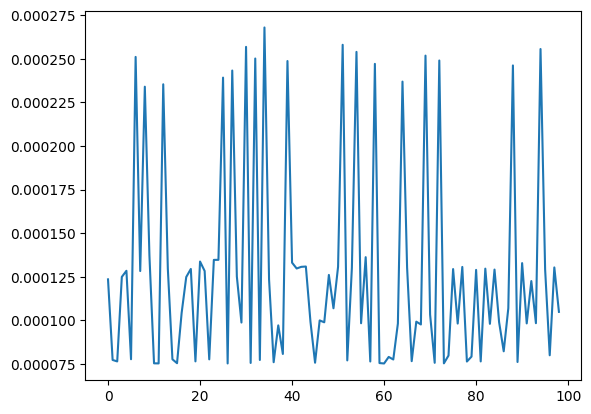

In [ ]:
import matplotlib.pyplot as plt

errores_v = entrenar_red(500,datos_ej1,pesos_ej1,0.1,red_size,0.5)

print('pesos actualizados',pesos_ej1)
print(errores_v[len(errores_v)-1])
plt.plot(errores_v[len(errores_v)-1])
plt.show()

In [ ]:
# cargamos los datos de prueba
import numpy as np
datos_prueba = np.genfromtxt("XOR_tst.csv", delimiter="," , skip_header=1)
datos_prueba = datos_prueba[0:9]
datos_pruebas = []
for i in np.arange(0,len(datos_prueba)):
  datos_pruebas.append( np.insert(datos_prueba[i],0,-1) )
#print(datos_ej1)

In [ ]:
# prueba
def prueba_red(datos_pruebas,pesos,red_size):
  contador_error = 0; errores_epoca = []; salidas_red = [];
  for i in np.arange(0,len(datos_pruebas)):
    patron_i = datos_pruebas[i]
    entradas = np.array(patron_i[0:len(patron_i)-1])
    yd = [patron_i[len(patron_i)-1]]
    y = propagacion_adelante(entradas,pesos,red_size,0.5)
    salidas_red.append(y[len(y)-1])
    error = calculo_error(yd,y[len(y)-1])
    if( error != 0):
      contador_error+=1
      errores_epoca.append(error)
  errores_v.append(errores_epoca)
  #print(errores_v)
  return salidas_red

In [ ]:
salidas = prueba_red(datos_pruebas,pesos_ej1,red_size)
for n in np.arange(0,len(datos_pruebas)):
  print('salida deseada: ',datos_pruebas[n][len(datos_pruebas[n])-1], ' salida red: ',salidas[n])

salida deseada:  1.0  salida red:  [0.9842366811018499]
salida deseada:  -1.0  salida red:  [-0.990065903859101]
salida deseada:  -1.0  salida red:  [-0.9901070256764183]
salida deseada:  -1.0  salida red:  [-0.9901196964894698]
salida deseada:  -1.0  salida red:  [-0.9909295631419115]
salida deseada:  1.0  salida red:  [0.9840278551957455]
salida deseada:  1.0  salida red:  [0.9843085625134564]
salida deseada:  -1.0  salida red:  [-0.9913139697156469]
salida deseada:  1.0  salida red:  [0.9844957133579777]


## Ejercicio 2
Utilice para entrenamiento y prueba los conjuntos de datos concenttrn.csv y concent tst.csv, que consisten en dos clases distribuidas en forma concentrica como muestra la Figura 1. Determine la estructura de una red de tipo perceptron multicapa que resulte mas apropiada para resolver este
problema. Represente graficamente, con diferentes colores, el resultado de la clasificacion realizada por el perceptron multicapa.


In [ ]:
# cargamos los datos de entrenamiento
import numpy as np
datos_entrenamiento2 = np.genfromtxt("concent_trn.csv", delimiter="," , skip_header=1)
datos_entrenamiento2 = datos_entrenamiento2[0:99]
datos_ej2 = []
for i in np.arange(0,len(datos_entrenamiento2)):
 datos_ej2.append( np.insert(datos_entrenamiento2[i],0,-1) )
#datos = np.insert(datos_entrenamiento,0,-1,axis=1)
#print(datos_ej2)

In [ ]:
# definimos el tamaño de la red y la cantidad de neuronas en cada capa
red_size_ej2 = [2,1]

In [ ]:
# defino la matriz de pesos
pesos_ej2 = []
pesos_ej2.append(np.random.rand(red_size_ej2[0],len(datos_entrenamiento2[0]-1))-0.5)
for i in np.arange(1,len(red_size_ej2)):
  pesos_ej2.append(np.random.rand(red_size_ej2[i],red_size_ej2[i-1]+1)-0.5)
print(pesos_ej2)

[array([[-0.05883849, -0.34979734, -0.24314857],
       [ 0.38149949, -0.4897823 , -0.16822968]]), array([[-0.31561065,  0.10751984, -0.05841747]])]


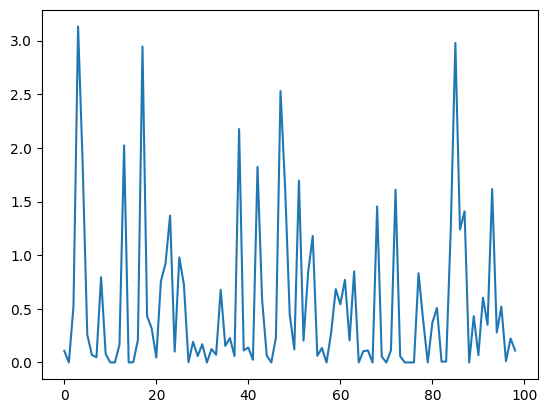

In [ ]:
# entreno la red
errores_v_ej2 = entrenar_red(epocas_max=300,datos=datos_ej2,pesos=pesos_ej2,eta=0.1,red_size=red_size_ej2,a=0.5)
plt.plot(errores_v_ej2[len(errores_v_ej2)-1])
plt.show()

In [ ]:
# cargamos los datos de prueba
datos_prueba_ej2 = np.genfromtxt("concent_tst.csv", delimiter="," , skip_header=1)
datos_prueba_ej2 = datos_prueba_ej2
datos_pruebas_ej2 = []
for i in np.arange(0,len(datos_prueba_ej2)):
  datos_pruebas_ej2.append( np.insert(datos_prueba_ej2[i],0,-1) )
#print(datos_pruebas_ej2)

In [ ]:
# prueba de la red
salidas_ej2 = prueba_red(datos_pruebas_ej2,pesos_ej2,red_size_ej2)
for n in np.arange(0,10):
  print('salida deseada: ',datos_pruebas_ej2[n][len(datos_pruebas_ej2[n])-1], ' salida red: ',salidas_ej2[n])

salida deseada:  1.0  salida red:  [-0.721552829242339]
salida deseada:  1.0  salida red:  [0.8338326203672326]
salida deseada:  1.0  salida red:  [0.7900956304262488]
salida deseada:  1.0  salida red:  [0.46385802379957997]
salida deseada:  -1.0  salida red:  [-0.5485248433494114]
salida deseada:  -1.0  salida red:  [-0.7504735547765624]
salida deseada:  -1.0  salida red:  [-0.7235422052939948]
salida deseada:  1.0  salida red:  [0.9912620578607723]
salida deseada:  1.0  salida red:  [0.8589984110858637]
salida deseada:  1.0  salida red:  [0.7577607033151925]


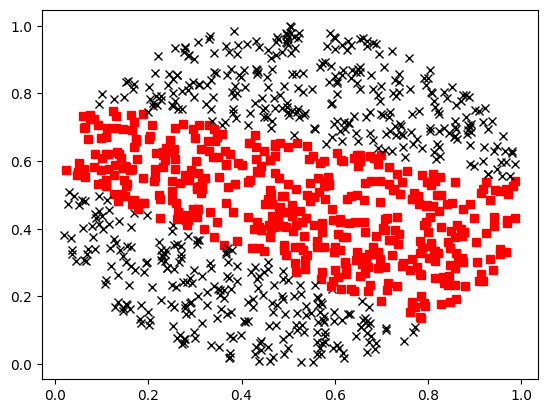

In [ ]:
# dibujamos los resultados
plt.figure('puntos del ejercicio 2')
for n in np.arange(0,len(salidas_ej2)-1):
  nodo = datos_pruebas_ej2[n]
  if(salidas_ej2[n][0] < 0):
    plt.plot(nodo[1],nodo[2],'rs')
  else:
    plt.plot(nodo[1],nodo[2],'kx')
plt.show()

## Ejercicio 3
Iris es el genero de una planta herbacea con flores que se utilizan en decoracion. Dentro de este genero existen muy diversas especies, entre las que
se han estudiado: Iris setosa, Iris versicolor e Iris virginica (ver Figura 2).
Estas tres especies pueden distinguirse segun las dimensiones de sus petalos y
sepalos. Un grupo de investigadores ha recopilado la informacion correspondiente a las longitudes y anchos de los petalos y sepalos de 50 plantas de cada
especie. En el archivo irisbin trn.csv se encuentra el conjunto de entrenamiento, y en irisbin tst.csv el de prueba, generado a partir de estas mediciones (en cm), junto con un codigo binario que indica la clase de cada muestra (especie) reconocida por el grupo de investigadores ([−1, −1, 1] = setosa,
[−1, 1, −1] = versicolor, [1, −1, −1] = virginica).
Determine la estructura optima de un perceptron multicapa para resolver este
problema. Explore como varıa el desempeno al usar distintas tasas de aprendizaje, y para cada caso grafique las curvas de error cuadratico total y error
de clasificacion en funcion de las epocas de entrenamiento.
